In [3]:
%matplotlib inline
import sys
import helper_functions as hf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import scipy.sparse as ssp

hf.set_plot_defaults(fontsize=12)
sc.settings.set_figure_params(dpi=150)  # low dpi (dots per inch) yields small inline figures

### Load Data

In [4]:
adata = sc.read('GSM7208220_210902_PATBROWN_final.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 45504 × 31402
    obs: 'barcode', 'barcode_seq', 'Hash1', 'Hash1_reads', 'Hash2', 'Hash2_reads', 'Hash3', 'Hash3_reads', 'Hash4', 'Hash4_reads', 'n_counts_txome', 'n_counts', 'mito_frac', 'Hash1_ind', 'Hash2_ind', 'Hash3_ind', 'Hash4_ind', 'sample', 'timepoint', 'genotype', 'tissue', 'library', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

### PCA Project hm41 mutant onto WT

In [6]:
# Wolbatch mask
mask = adata.obs['genotype'].str.contains('AB|RNF')
mask = mask.values

    filtering genes...


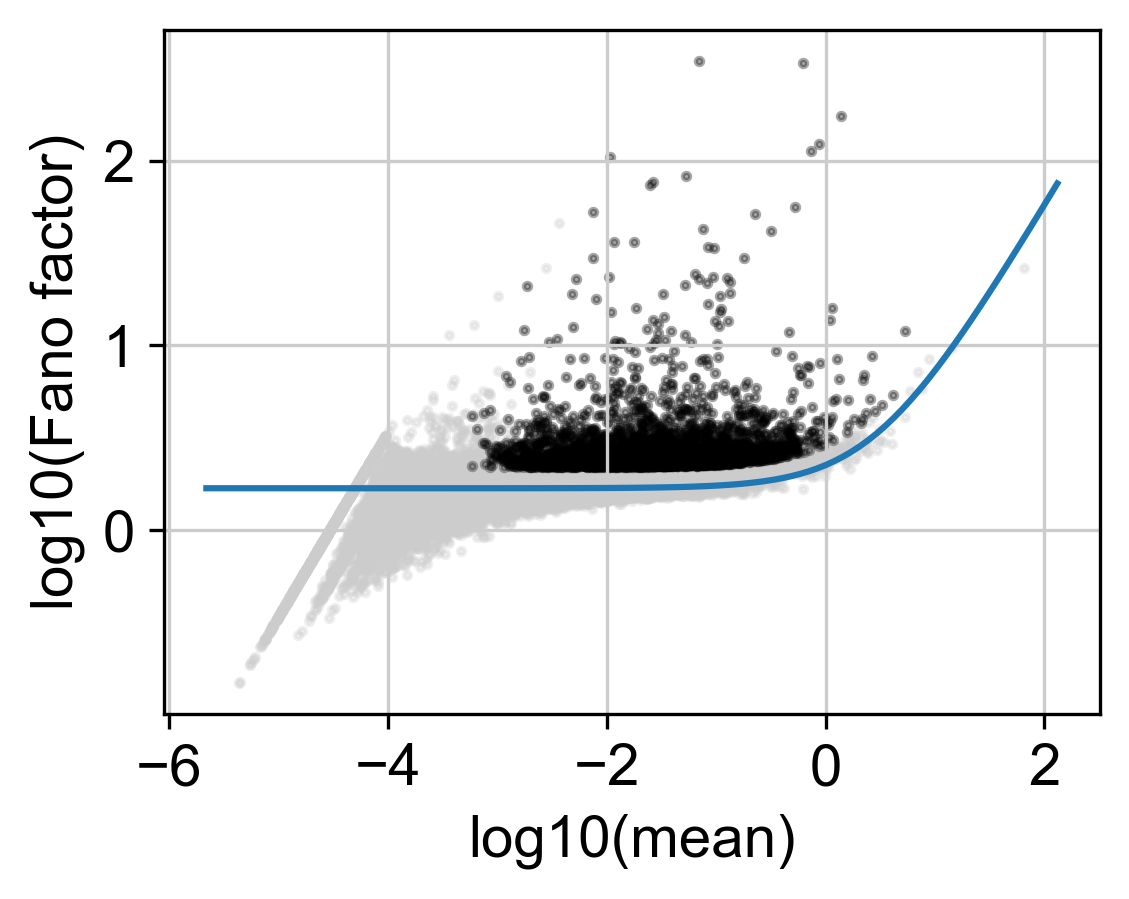

        3501 highly variable genes
    running PCA...
    finding neighbors...
    running UMAP...
    running Leiden clustering...


In [7]:
hf.process_ad(adata,
    normalize=False,
    plot_vscore=True,
    n_components=50,
    n_neighbors=10,
    verbose=True, 
    batch_base_mask=mask      # Use basis of WT Strains for all cells
    )

### Plot some genes

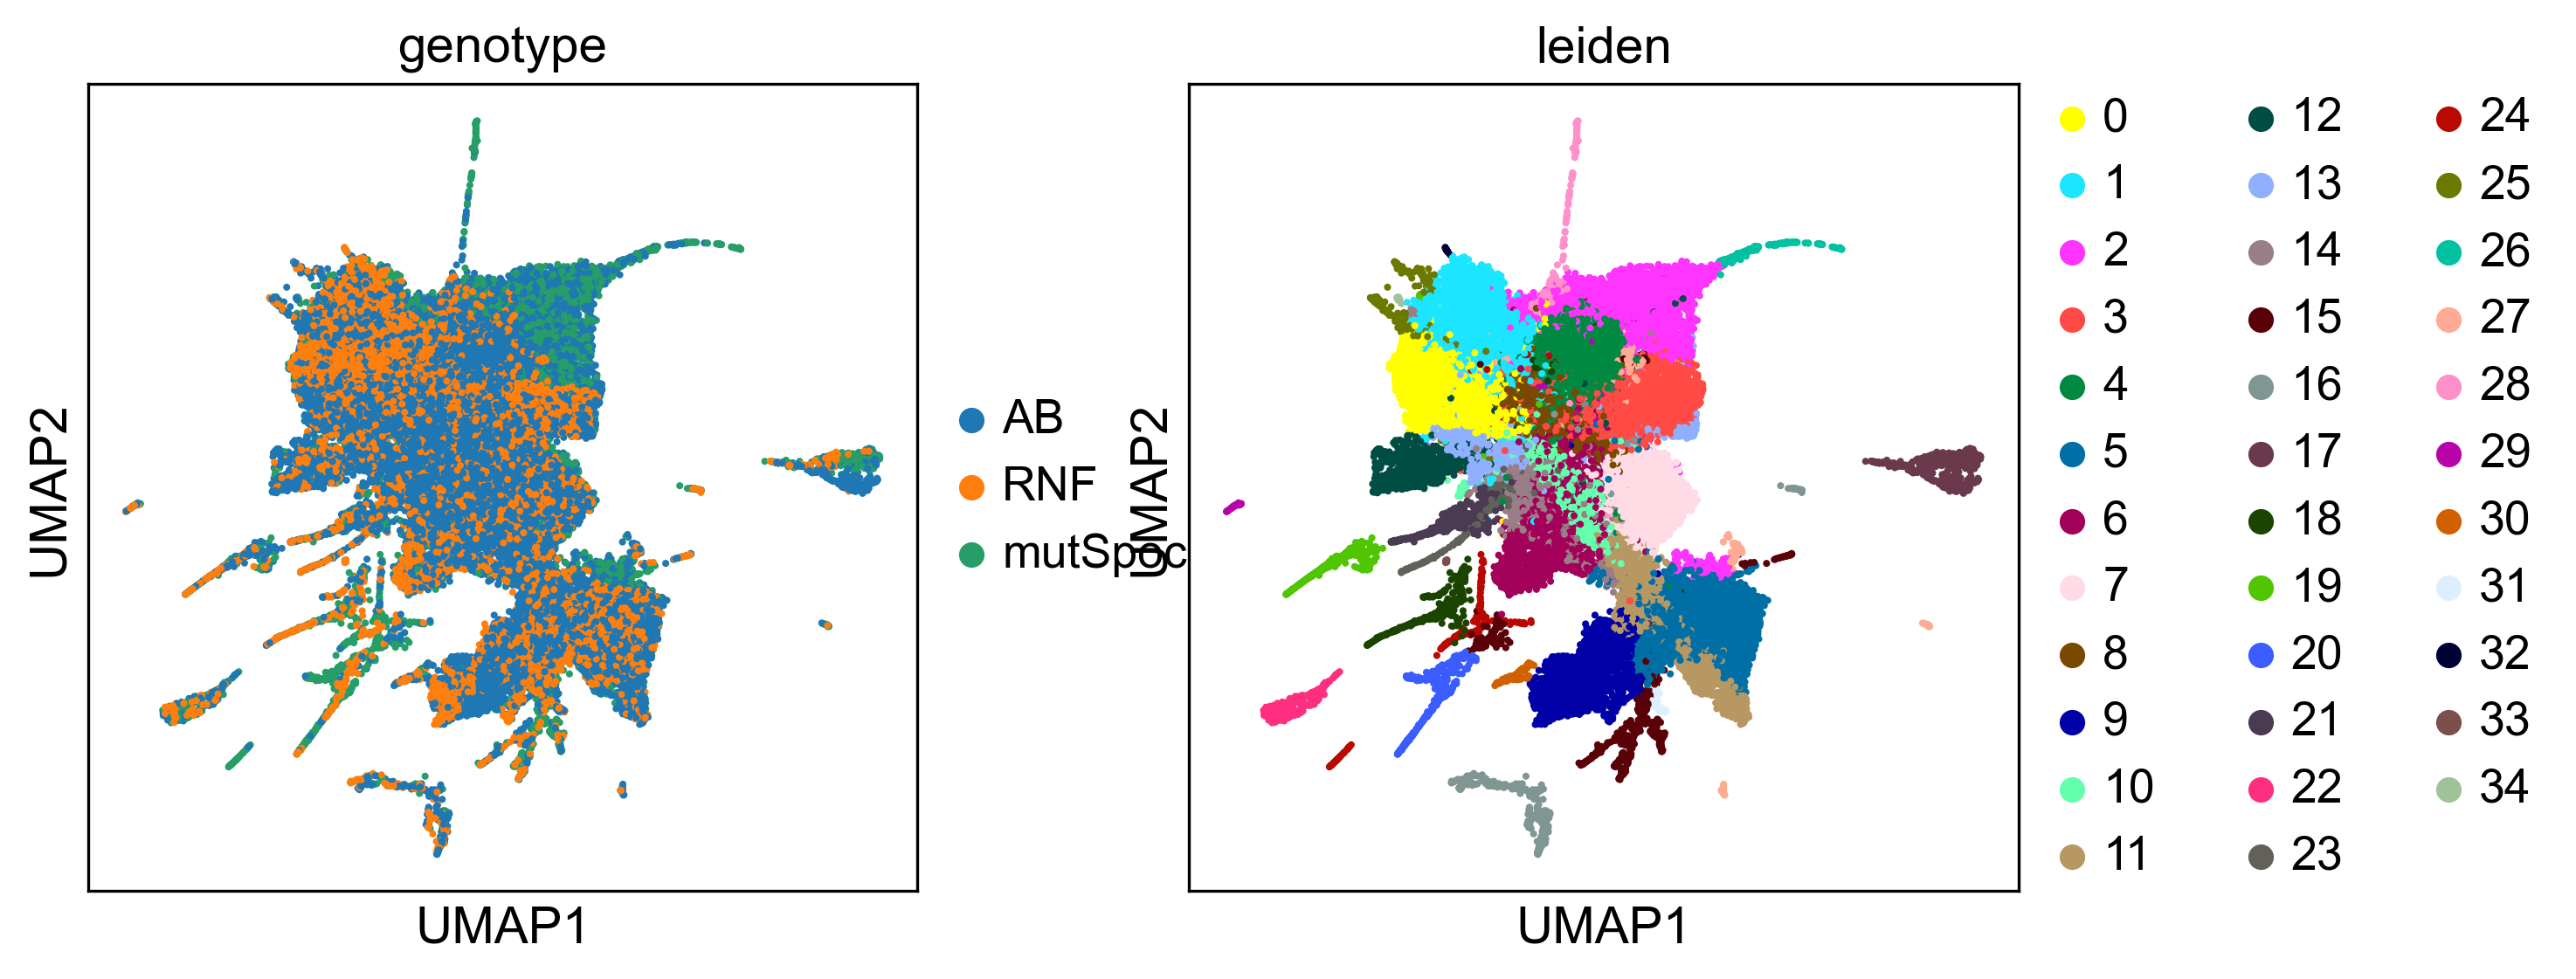

In [8]:
sc.pl.umap(adata, color=['genotype','leiden'], size=15)

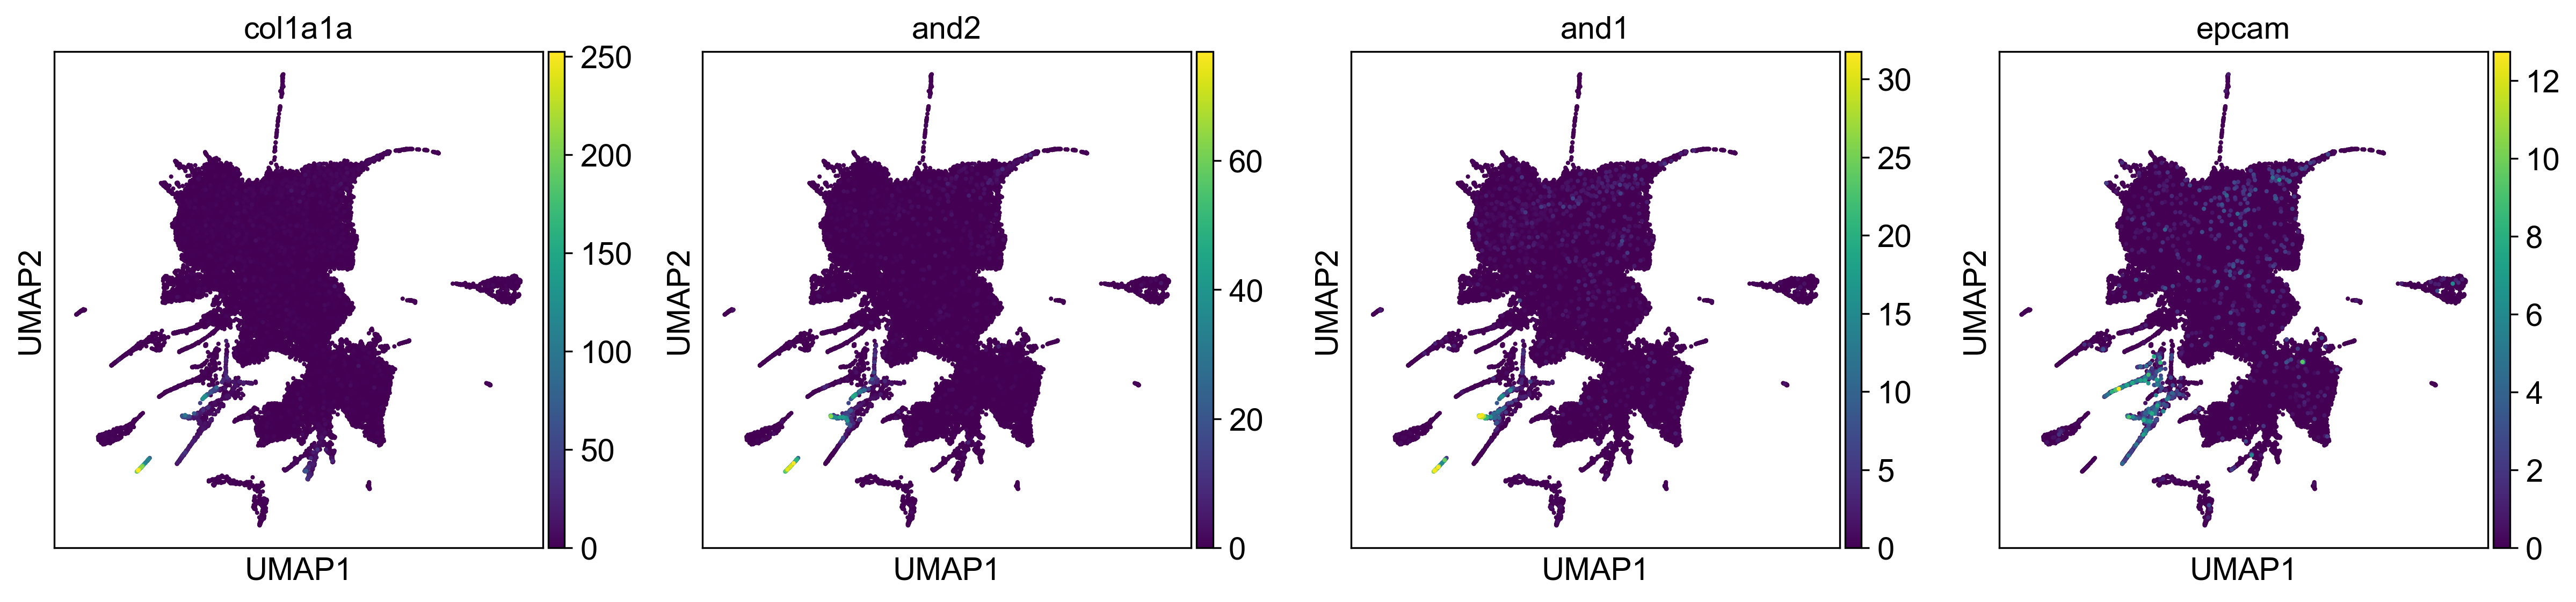

In [9]:
sc.pl.umap(adata, color=['col1a1a','and2','and1','epcam'], size=15)

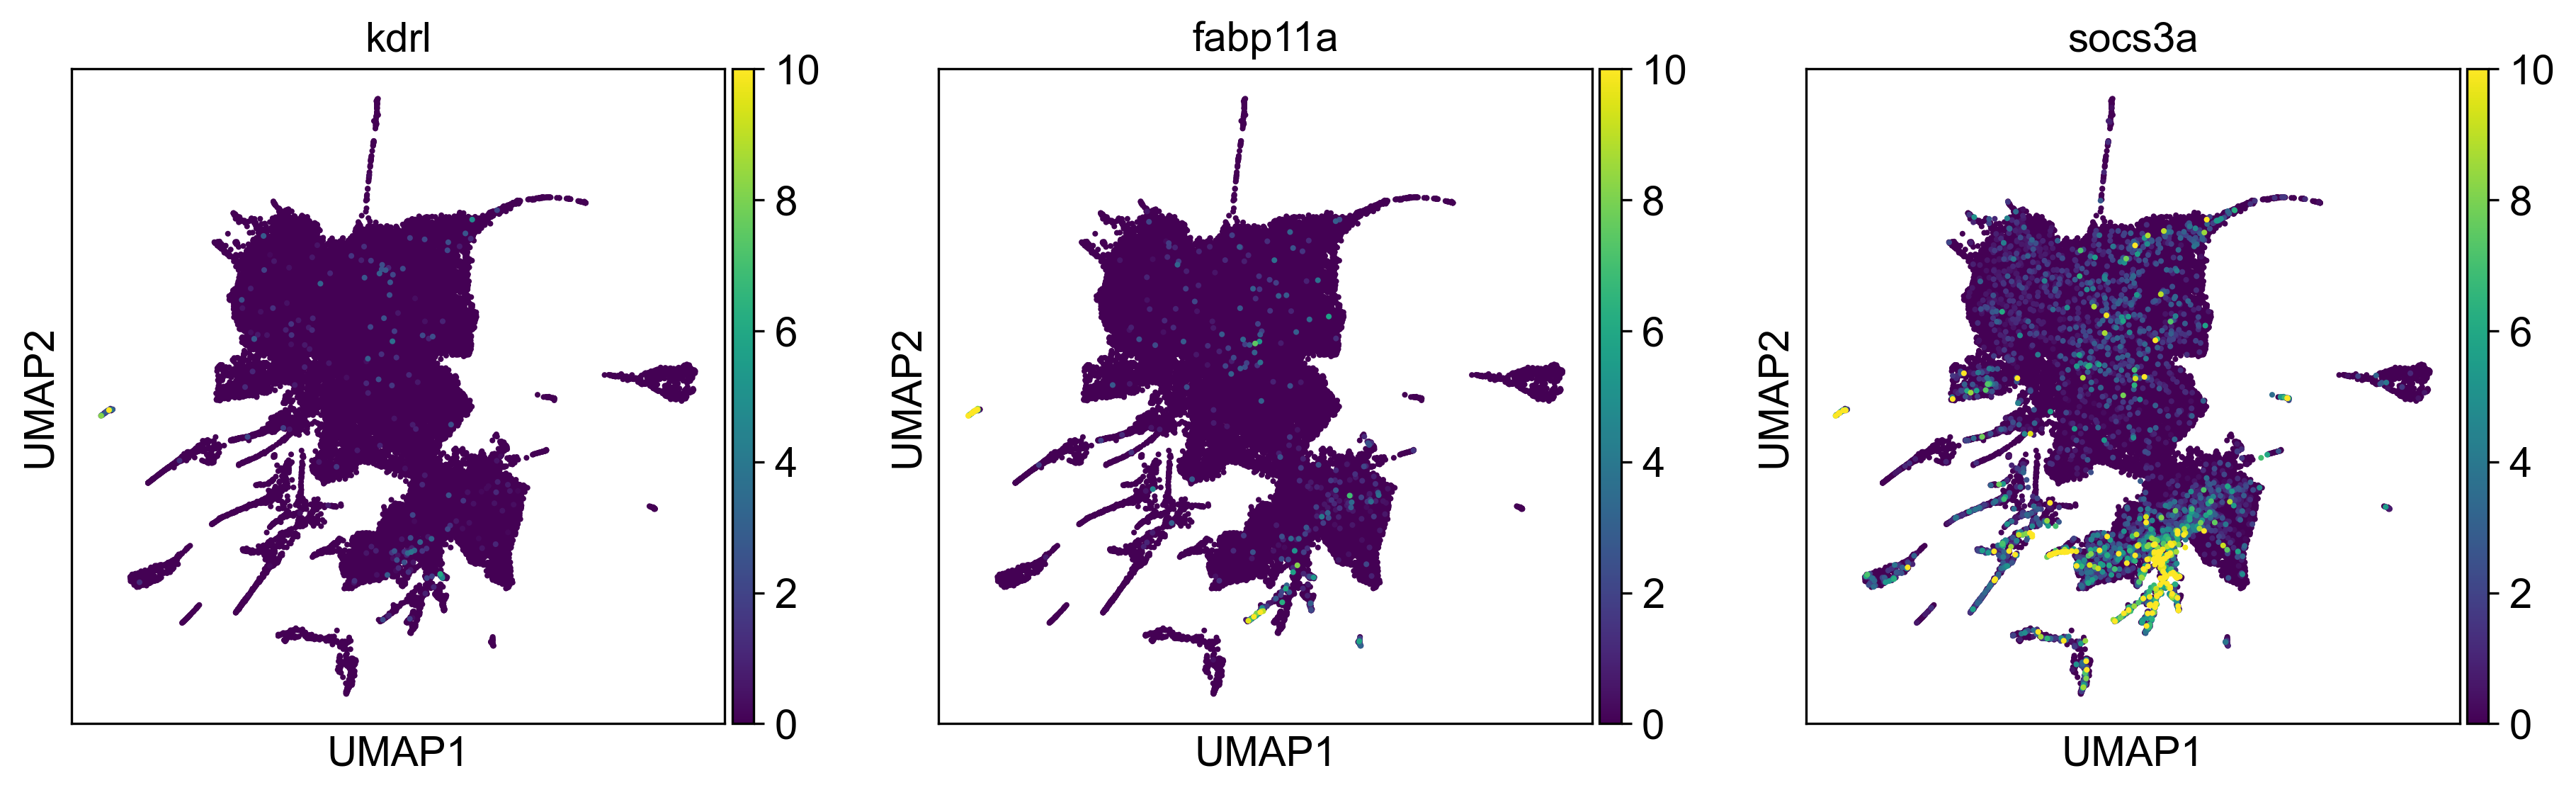

In [10]:
sc.pl.umap(adata, color=['kdrl','fabp11a','socs3a'], vmax=10, size=15)

### Annotate leiden clusters

In [9]:
# Set default annotation to neurons
adata.obs['annotations']='neurons'

# Annotate cells
annotations = {
    '9': 'glia',
    '15': 'vasculature',
    '16': 'oligodendrocyte',
    '17': 'blood',
    '18': 'skin',
    '20': 'skin',
    '22': 'pharyngeal arch',
    '26': 'muscle',
    '28': 'liver',
    '29': 'vasculature_2',
    '30': 'migrating neuron'
}


for i in annotations:
    ind = adata.obs['leiden']==i
    adata.obs['annotations'][ind] = annotations[i]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/Applications/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'annotations' as categorical


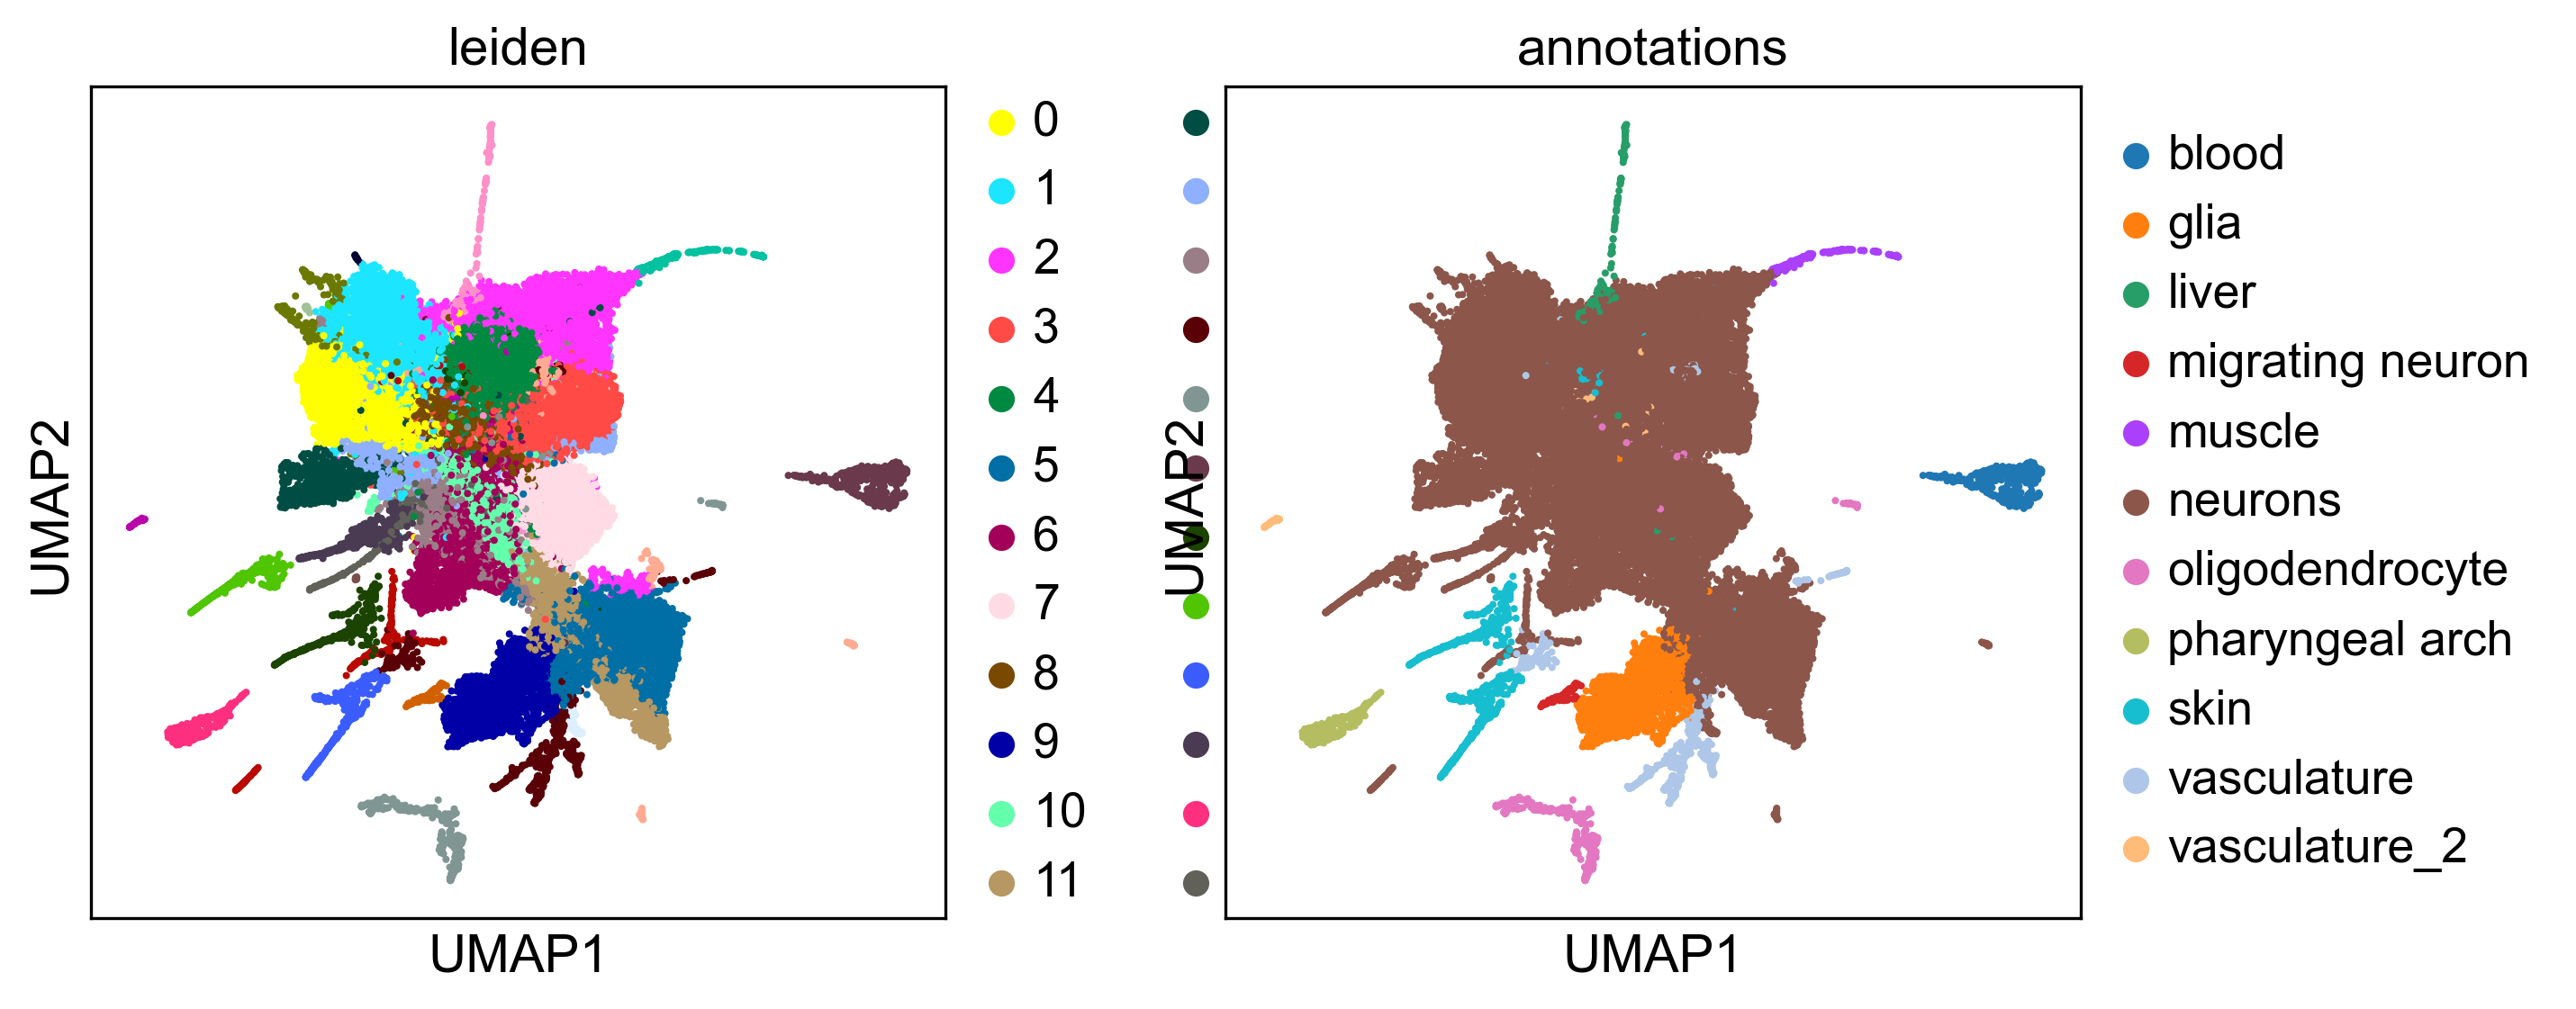

In [10]:
# Plot Cell annotations
sc.pl.umap(adata, color=['leiden','annotations'], size=15)

## Remove non-neuronal cells, Save filtered data, and Redo analysis

In [11]:
# annotations = {
#     '5': 'unknown',
#     '9': 'glia',
#     '15': 'vasculature',
#     '16': 'oligodendrocyte',
#     '17': 'blood',
#     '18': 'skin',
#     '20': 'skin',
#     '22': 'pharyngeal arch',
#     '26': 'muscle',
#     '28': 'liver',
#     '29': 'vasculature',
#     '30': 'migrating neuron'
# }


# Identify cell populations to keep
ind = ~adata.obs['leiden'].isin(['5','18','20','22','26','28'])

In [12]:
# Original data (non Z-scored) was saved earlier
adata_orig = sc.read('210902_PATBROWN_final.h5ad')

# New observations
obs = adata.obs

# Transfer Observations
adata_orig.obs = obs

# Update adata
adata = adata_orig

# Remove unwanted cells
adata = adata[ind]

# Write file
adata.write('210902_PATBROWN_final_filtered.h5ad')

In [13]:
adata

View of AnnData object with n_obs × n_vars = 40459 × 31402
    obs: 'barcode', 'barcode_seq', 'Hash1', 'Hash1_reads', 'Hash2', 'Hash2_reads', 'Hash3', 'Hash3_reads', 'Hash4', 'Hash4_reads', 'n_counts_txome', 'n_counts', 'mito_frac', 'Hash1_ind', 'Hash2_ind', 'Hash3_ind', 'Hash4_ind', 'sample', 'timepoint', 'genotype', 'tissue', 'library', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'annotations'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

### Redo analysis on filtered data

In [14]:
# Wolbatch mask
mask = adata.obs['genotype'].str.contains('AB|RNF')
mask = mask.values

    filtering genes...


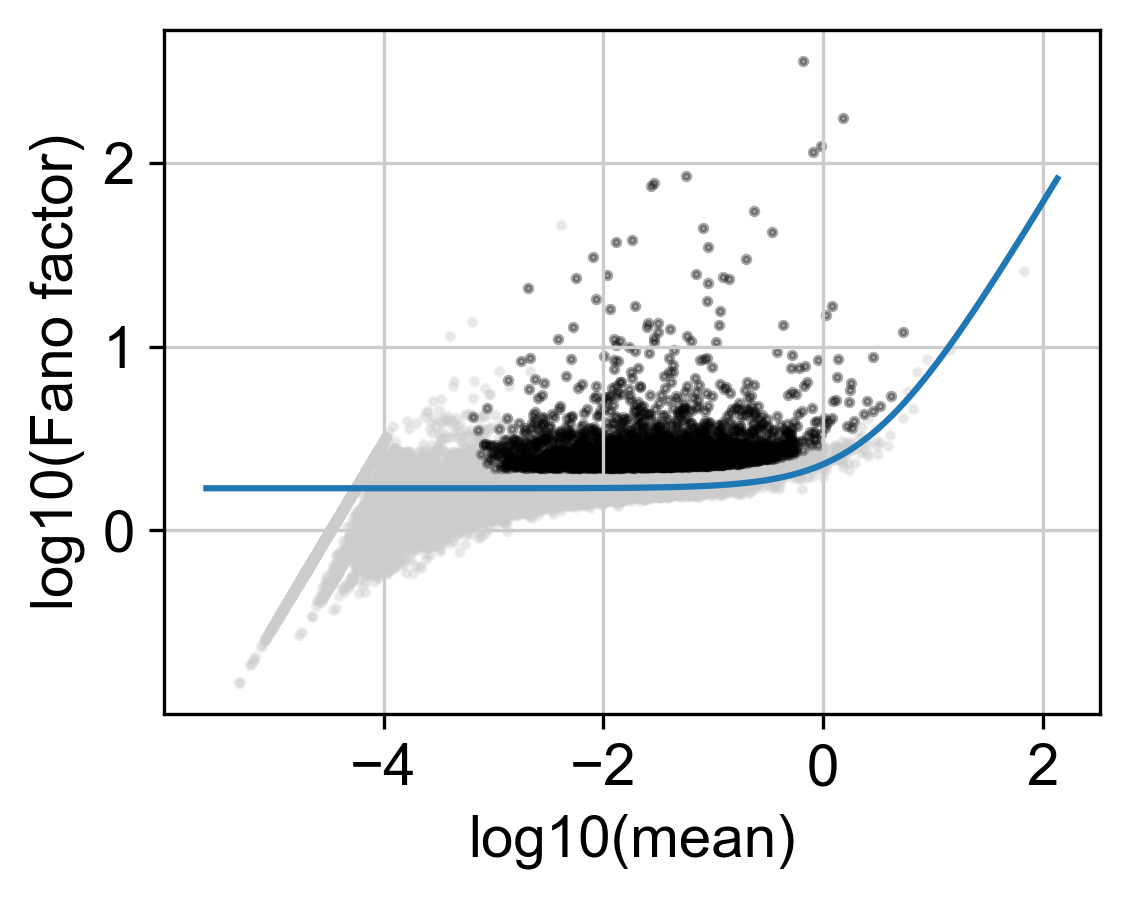

Trying to set attribute `.var` of view, copying.


        3461 highly variable genes
    running PCA...
    finding neighbors...
    running UMAP...
    running Leiden clustering...


In [15]:
hf.process_ad(adata,
    normalize=False,
    plot_vscore=True,
    n_components=50,
    n_neighbors=10,
    verbose=True, 
    batch_base_mask=mask      # Use basis of WT Strains for all cells
    )

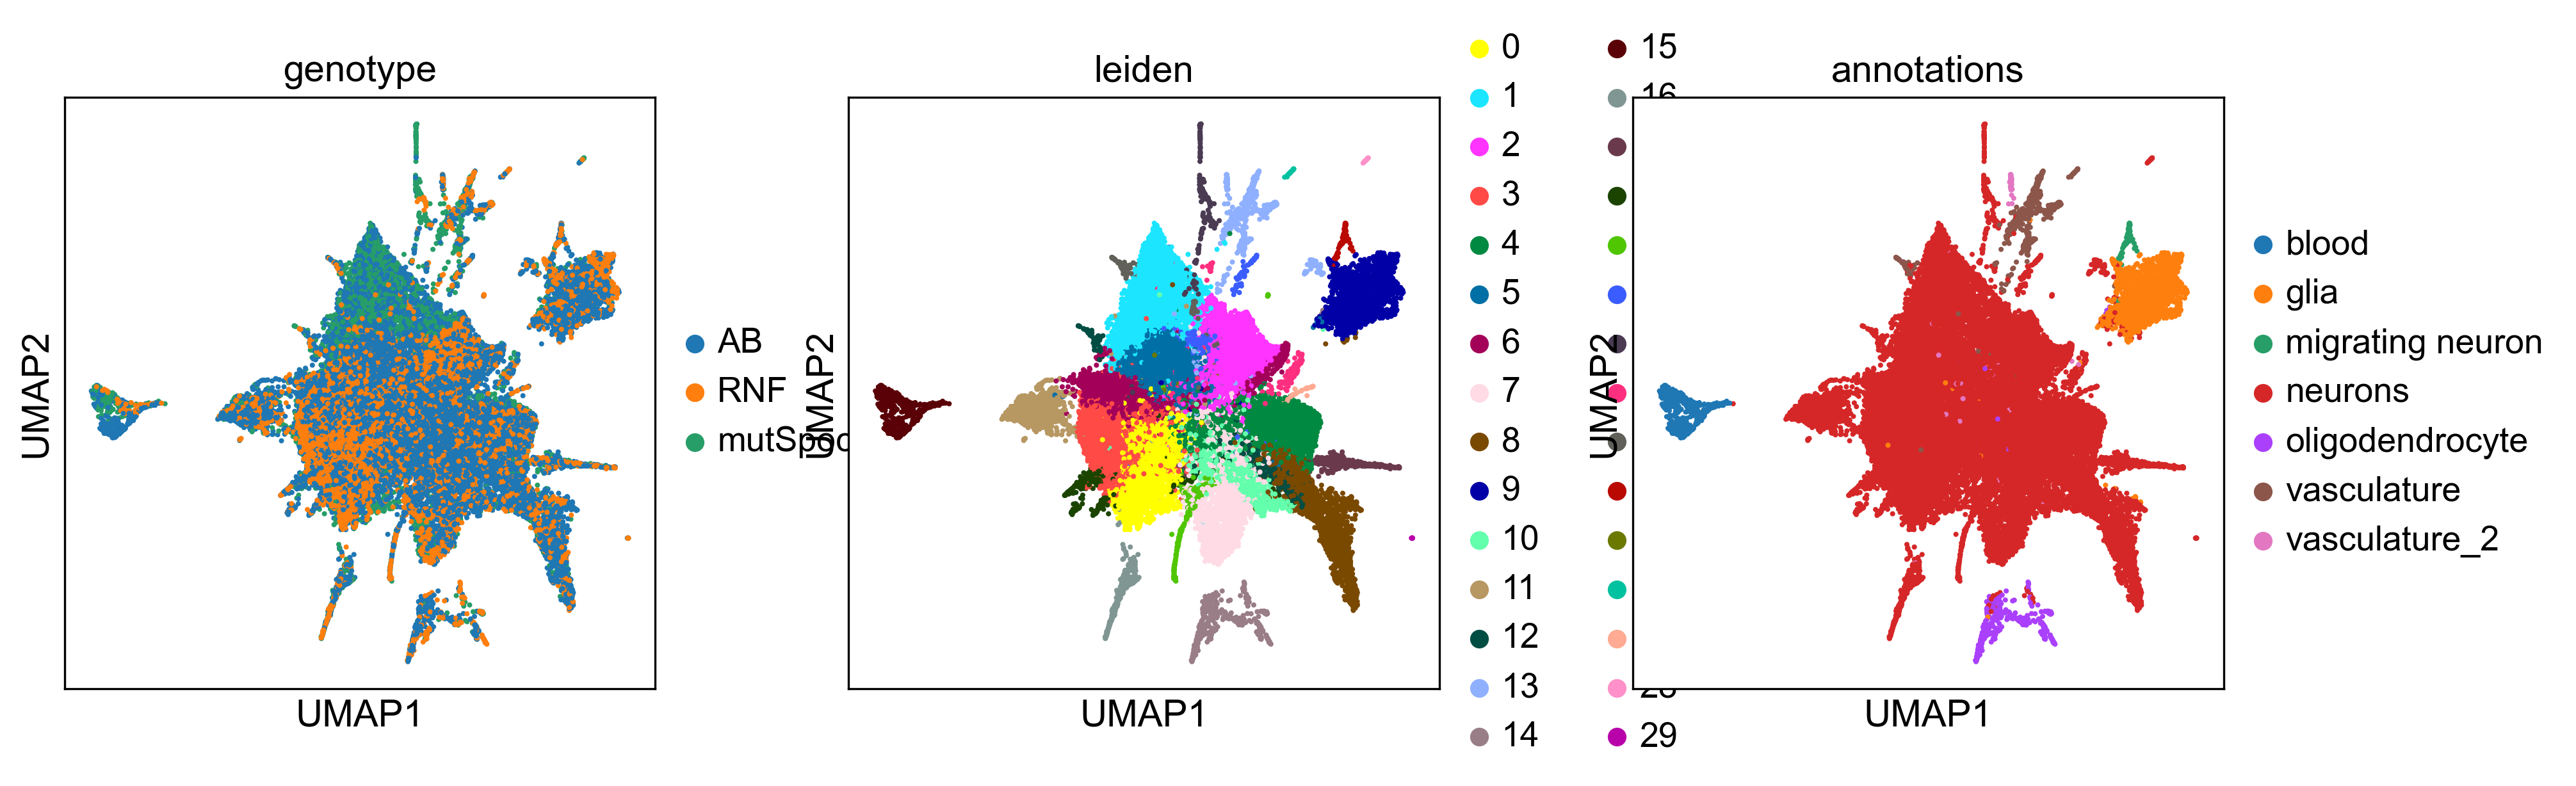

In [16]:
sc.pl.umap(adata, color=['genotype','leiden','annotations'], size=15)

## Re-annotate filtered dataset and save

In [17]:
adata.obs['annotations']='neurons'


annotations = {
    '1' : 'muscle',
    '9' : 'glia',
    '13': 'vasculature',
    '14': 'oligodendrocytes',
    '15': 'blood',
    '20': 'microglia',
    '21': 'epithelium',
    '23': 'epidermis',
    '25': 'vasculature',
    '26': 'lymphatic vasculature',
    '28': 'neutrophil'
}


for i in annotations:
    ind = adata.obs['leiden']==i
    adata.obs['annotations'][ind] = annotations[i]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/Applications/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'annotations' as categorical


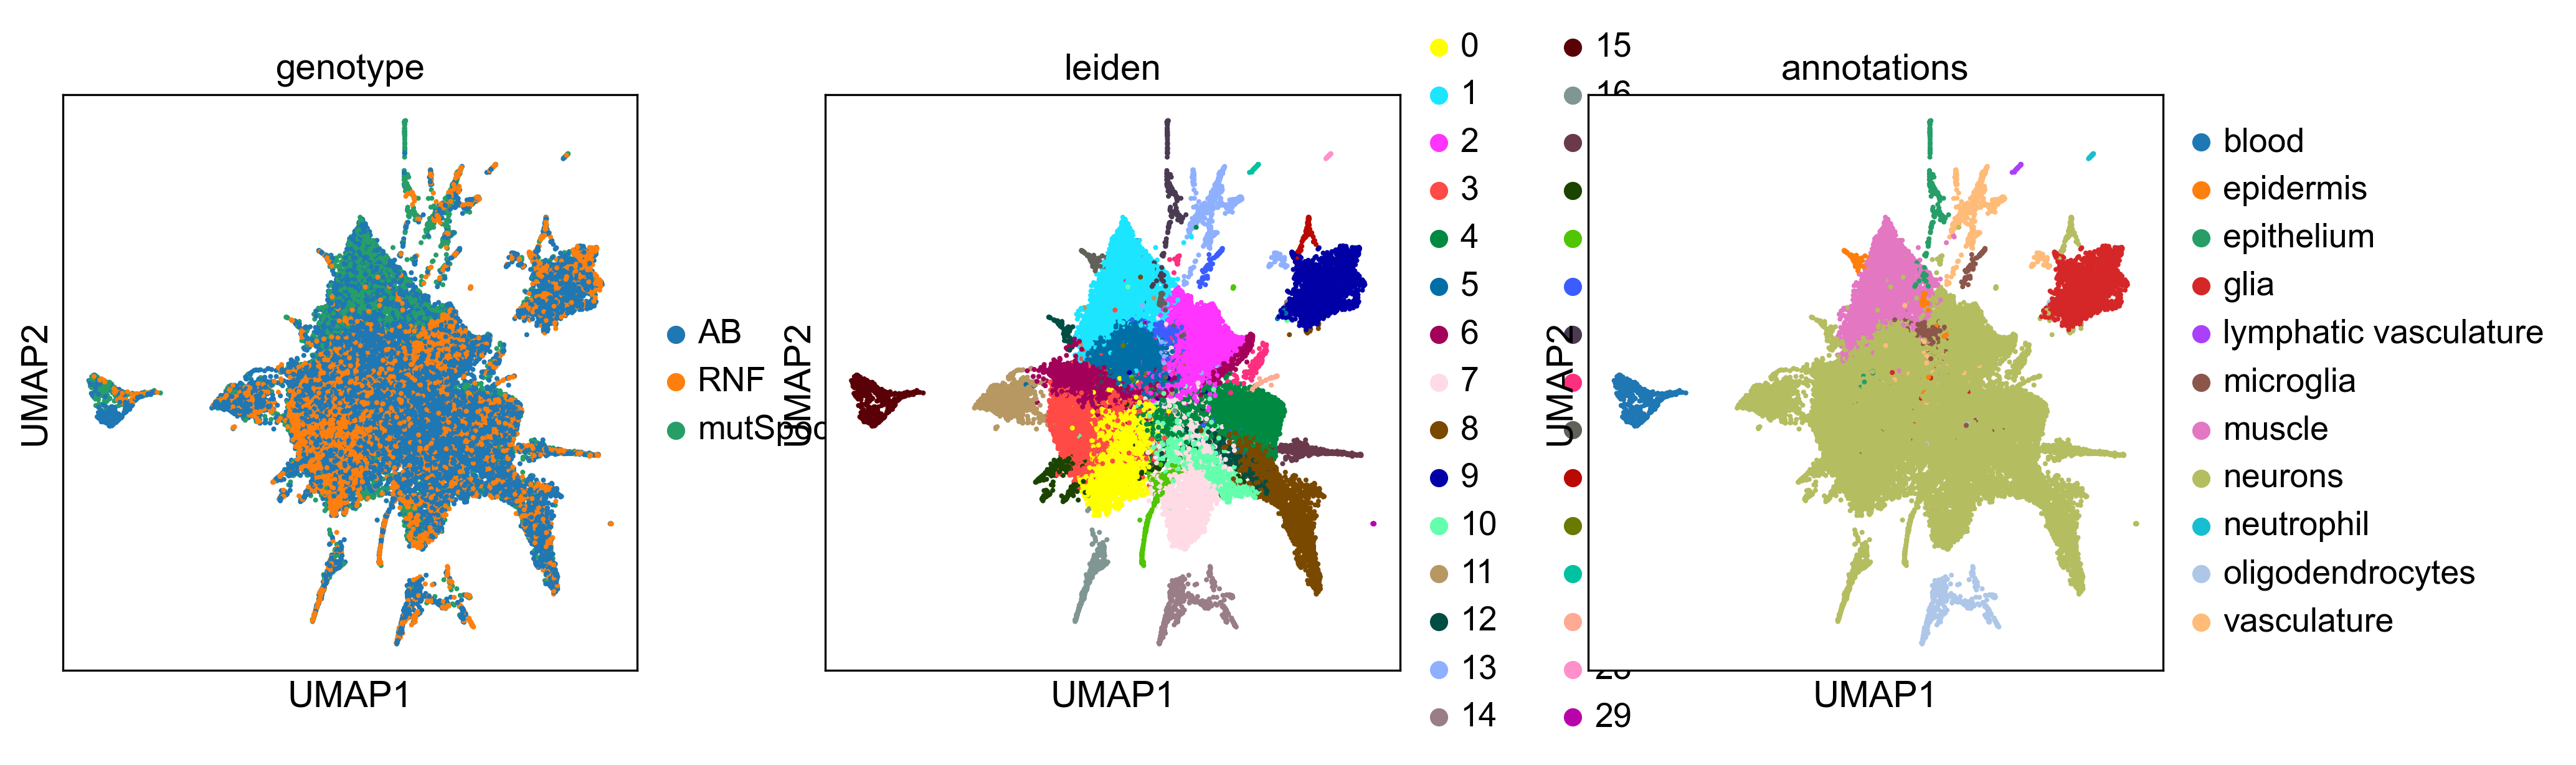

In [18]:
sc.pl.umap(adata, color=['genotype','leiden','annotations'], size=15)

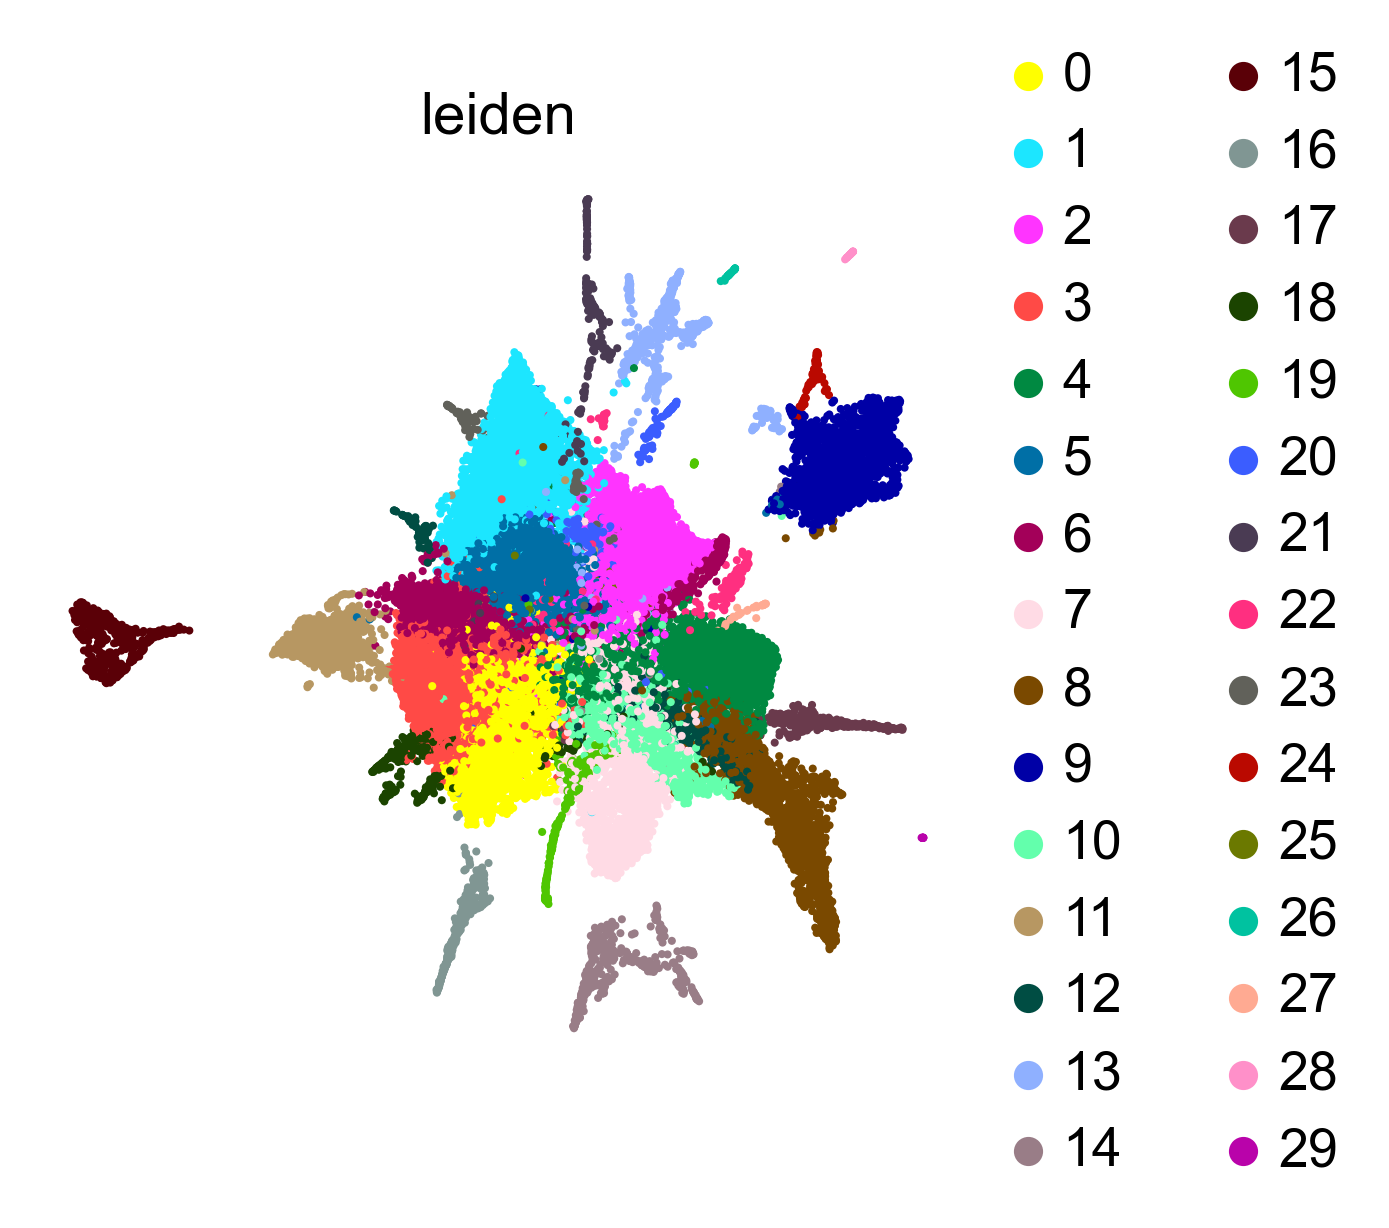

In [19]:
sc.pl.umap(adata, color='leiden', size=15, frameon=False, save='_Filtered_leiden.pdf')

['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b', '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78']
['blood' 'epidermis' 'epithelium' 'glia' 'lymphatic vasculature'
 'microglia' 'muscle' 'neurons' 'neutrophil' 'oligodendrocytes'
 'vasculature']


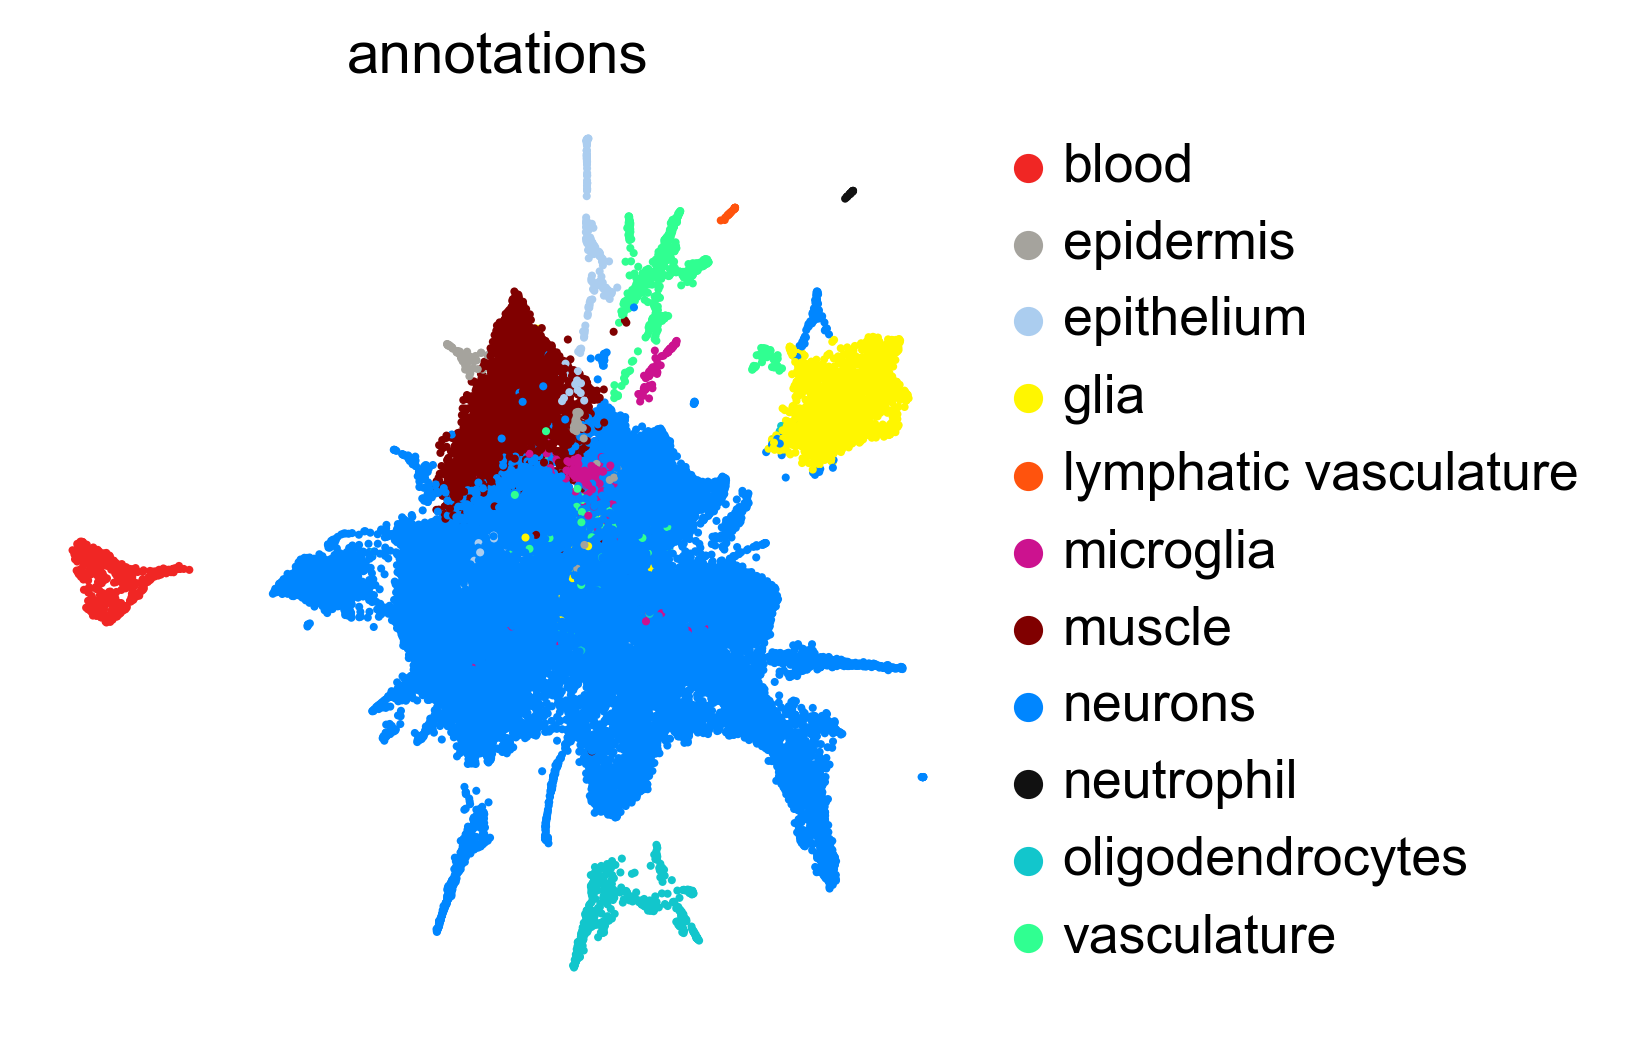

In [20]:
# Annotation colors
print(adata.uns['annotations_colors'])  

# Annotation categories
print(adata.obs['annotations'].cat.categories.values)

# Change color on annotations
tmp = adata
tmp.uns['annotations_colors'] = ['#F02624', '#A5A39D', '#ABCDEF', '#FFF600', '#FF530D', '#CC128F',
                                 '#800000', '#0086FF', '#111111', '#12C6CC', '#30FF91']


sc.pl.umap(tmp, color='annotations', size=15, frameon=False, save='_Filtered_annotation_bright.pdf')

### Save Data

In [21]:
# Store Raw Reads
adata.X = adata.raw.X

# # Save adata
adata.write('210902_PATBROWN_final_filtered_updated.h5ad')